In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# plots
plt.rcParams['figure.figsize'] = (8,5)

# Loading Data
df = pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',')

df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
# Dropping completely empty columns
df = df.dropna(axis=1, how='all')

# Replacing -200 (invalid readings) with NaN
df = df.replace(-200, np.nan)

df.isna().sum()


,0
Date,114
Time,114
CO(GT),1797
PT08.S1(CO),480
NMHC(GT),8557
C6H6(GT),480
PT08.S2(NMHC),480
NOx(GT),1753
PT08.S3(NOx),480
NO2(GT),1756


In [ ]:
df = df.dropna()
df.shape


(827, 15)

In [ ]:
# Time format: convert "18.00.00" → "18:00:00"
df['Time'] = df['Time'].str.replace('.', ':', regex=False)

# Combining Date + Time
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

df = df.drop(columns=['Date', 'Time'])

df.head()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


EDA

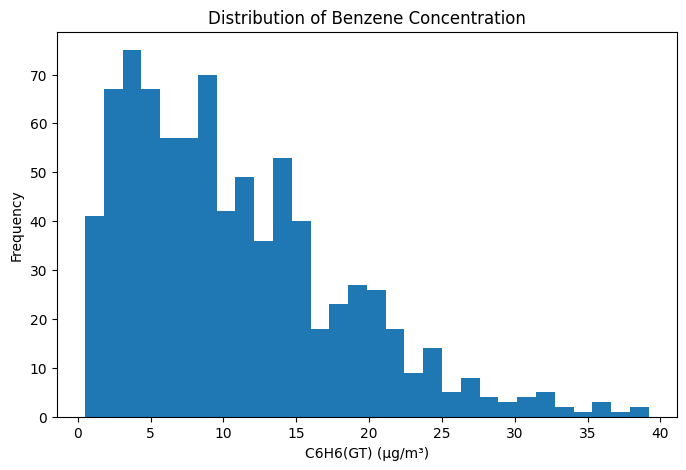

In [ ]:
# Choosing target column
target_col = 'C6H6(GT)'

plt.figure(figsize=(8,5))
plt.hist(df[target_col], bins=30)
plt.xlabel('C6H6(GT) (µg/m³)')
plt.ylabel('Frequency')
plt.title('Distribution of Benzene Concentration')
plt.show()


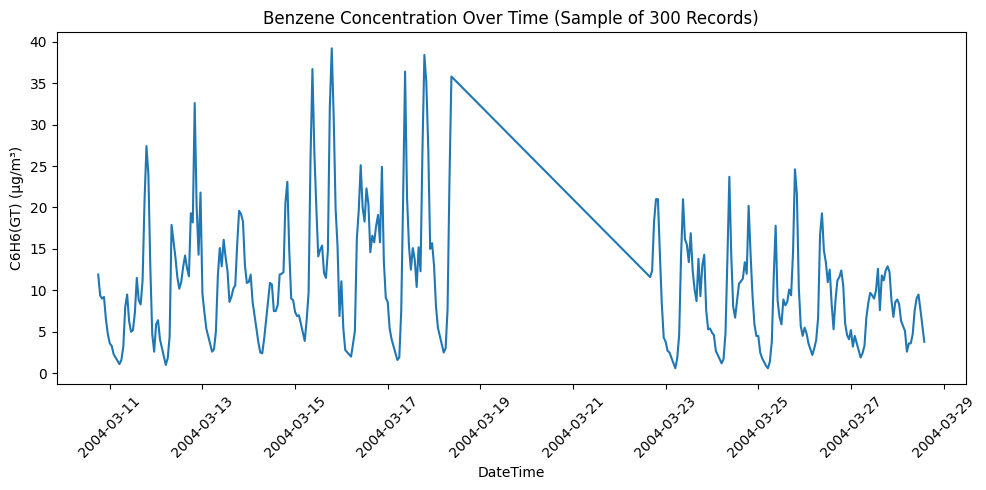

In [ ]:
# Sorting by time and taking a sample window
ts_sample = df.sort_values('DateTime').iloc[:300]

plt.figure(figsize=(10,5))
plt.plot(ts_sample['DateTime'], ts_sample['C6H6(GT)'])
plt.xticks(rotation=45)
plt.xlabel('DateTime')
plt.ylabel('C6H6(GT) (µg/m³)')
plt.title('Benzene Concentration Over Time (Sample of 300 Records)')
plt.tight_layout()
plt.show()


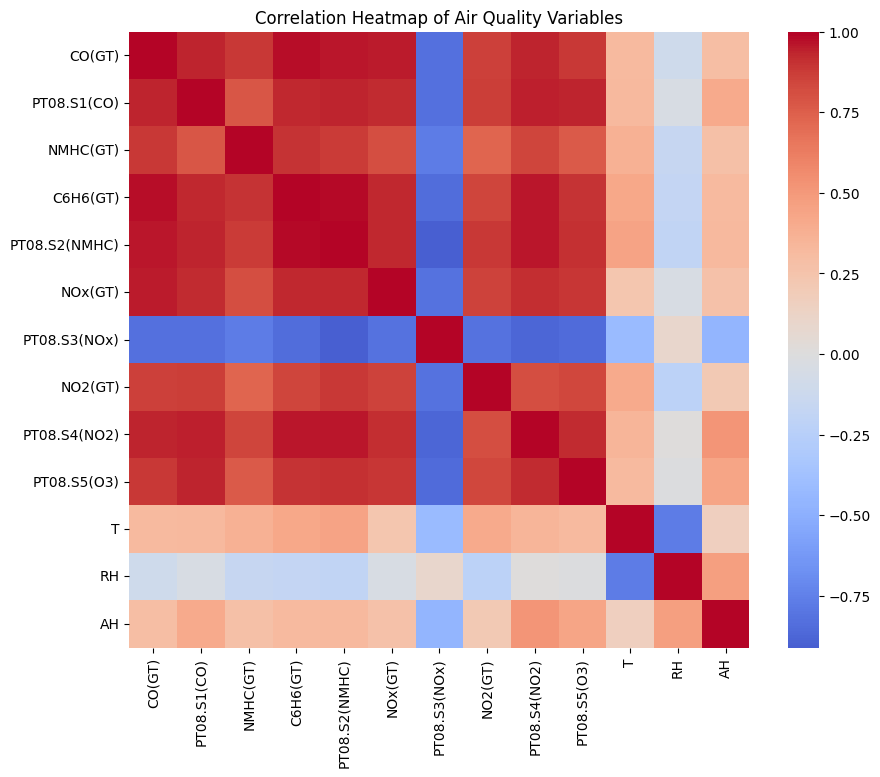

In [ ]:
numeric_df = df.drop(columns=['DateTime'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of Air Quality Variables')
plt.show()


In [ ]:
# Target column
target_col = 'C6H6(GT)'

X = numeric_df.drop(columns=[target_col])
y = numeric_df[target_col]

X.shape, y.shape


((827, 12), (827,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitying into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardising features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape


((661, 12), (166, 12))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Training Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicting
y_pred_rf = rf_model.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

mae, mse, rmse, r2


(0.06955421686747022,
 0.05260292469879655,
 np.float64(0.22935327488134227),
 0.9991158994375892)

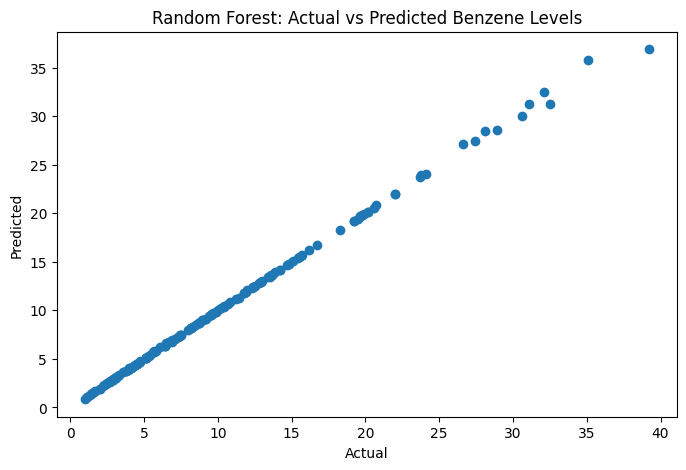

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted Benzene Levels")
plt.show()


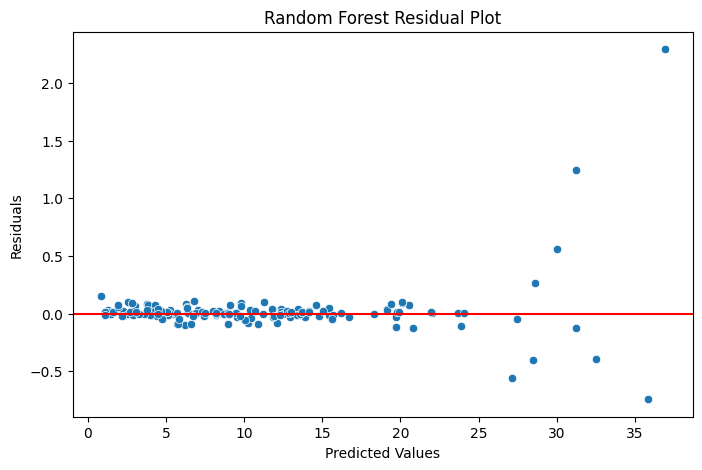

In [ ]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Random Forest Residual Plot")
plt.show()


SVR Model

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train SVR model (RBF kernel)
svr_model = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluation metrics
svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, y_pred_svr)

svr_mae, svr_mse, svr_rmse, svr_r2


(0.22453640416793014,
 0.3095918324022774,
 np.float64(0.5564097702253955),
 0.994796671198191)

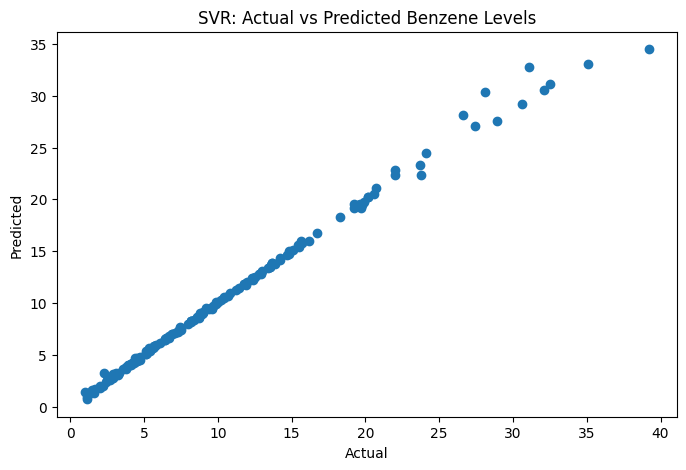

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_svr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVR: Actual vs Predicted Benzene Levels")
plt.show()


ANN Model

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Trainig ANN model
ann_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True
)

ann_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_ann = ann_model.predict(X_test_scaled)

# Evaluation metrics
ann_mae = mean_absolute_error(y_test, y_pred_ann)
ann_mse = mean_squared_error(y_test, y_pred_ann)
ann_rmse = np.sqrt(ann_mse)
ann_r2 = r2_score(y_test, y_pred_ann)

ann_mae, ann_mse, ann_rmse, ann_r2


(0.329454784335943,
 0.17948748749635432,
 np.float64(0.42365963637848997),
 0.9969833428549866)

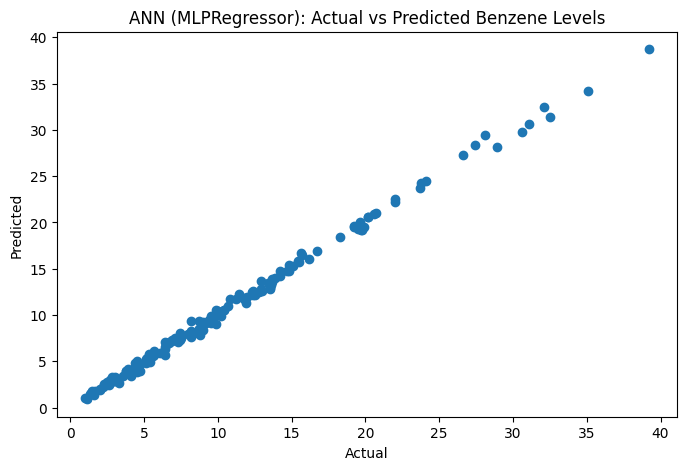

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_ann)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("ANN (MLPRegressor): Actual vs Predicted Benzene Levels")
plt.show()


In [ ]:
# Metrics into a table
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVR', 'ANN (MLP)'],
    'MAE':  [mae,          svr_mae,      ann_mae],
    'MSE':  [mse,          svr_mse,      ann_mse],
    'RMSE': [rmse,         svr_rmse,     ann_rmse],
    'R2':   [r2,           svr_r2,       ann_r2]
})

results


,Model,MAE,MSE,RMSE,R2
0,Random Forest,0.069554,0.052603,0.229353,0.999116
1,SVR,0.224536,0.309592,0.556410,0.994797
2,ANN (MLP),0.329455,0.179487,0.423660,0.996983


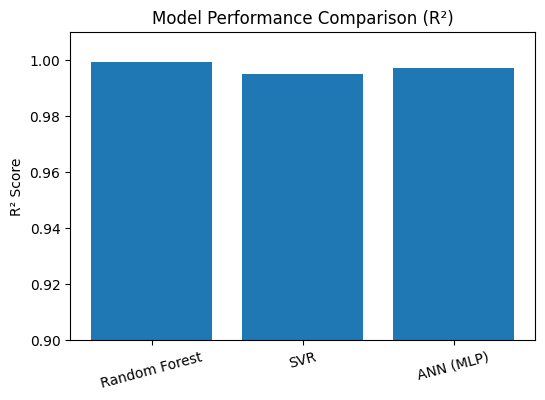

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(results['Model'], results['R2'])
plt.ylabel('R² Score')
plt.ylim(0.9, 1.01)
plt.title('Model Performance Comparison (R²)')
plt.xticks(rotation=15)
plt.show()


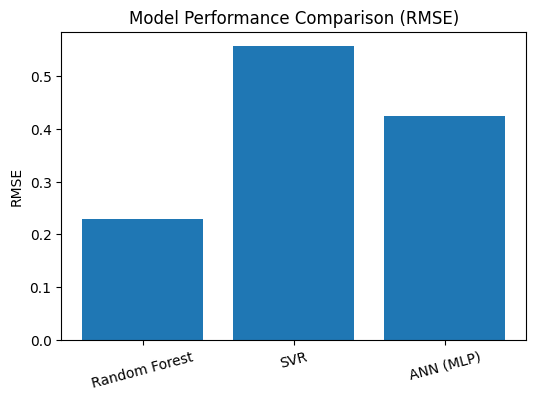

In [ ]:
#Model Performance comaprision RMSE
plt.figure(figsize=(6,4))
plt.bar(results['Model'], results['RMSE'])
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (RMSE)')
plt.xticks(rotation=15)
plt.show()


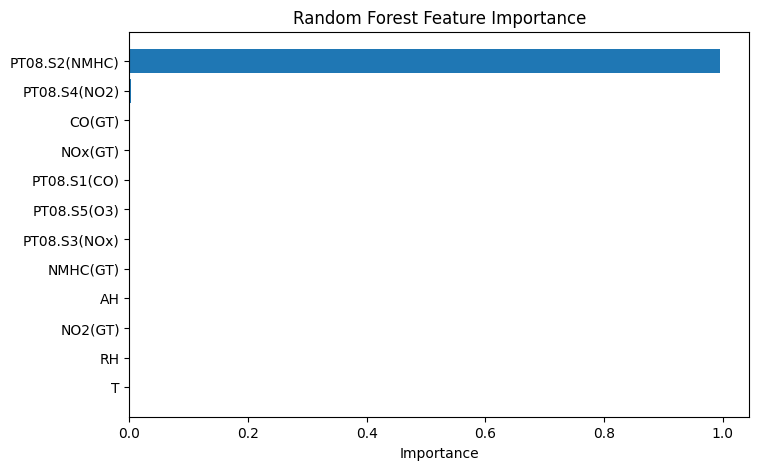

In [ ]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Sorting by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.barh(range(len(feature_names)), importances[indices])
plt.yticks(range(len(feature_names)), feature_names[indices])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()
